In [22]:
!pip install pandas --quiet
!pip install matplotlib --quiet
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime


SYMBOL = 'btc'

CRYPTOS = {
    'BITCOIN': 'BTC',
    'ETHEREUM': 'ETH',
    'TETHER': 'USDT',
    'RIPPLE': 'XRP',
    'SOLANA': 'SOL',
    'CARDANO': 'ADA',
    'POLKADOT': 'DOT',
    'DOGECOIN': 'DOGE',
    'PEPE': 'PEPE',
}


[notice] A new release of pip is available: 23.2.1 -> 25.0
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 25.0
[notice] To update, run: pip install --upgrade pip


In [39]:
df_all = {}
for name, symbol in CRYPTOS.items():
    df_all[symbol] = pd.read_csv(f'../data/{symbol}.csv', dtype=str)
    df = df_all[symbol]
    df['Date'] = pd.to_datetime(df["Date"])
    df['Open'] = df['Open'].str.replace(',', '').astype(float)
    df['Low'] = df['Low'].str.replace(',', '').astype(float)
    df['High'] = df['High'].str.replace(',', '').astype(float)
    df['Change %'] = df['Change %'].str.rstrip("%").astype(float)

    df = df[df['Date'] > datetime.strptime('2017-01-01', "%Y-%m-%d")]
    df_all[symbol] = df


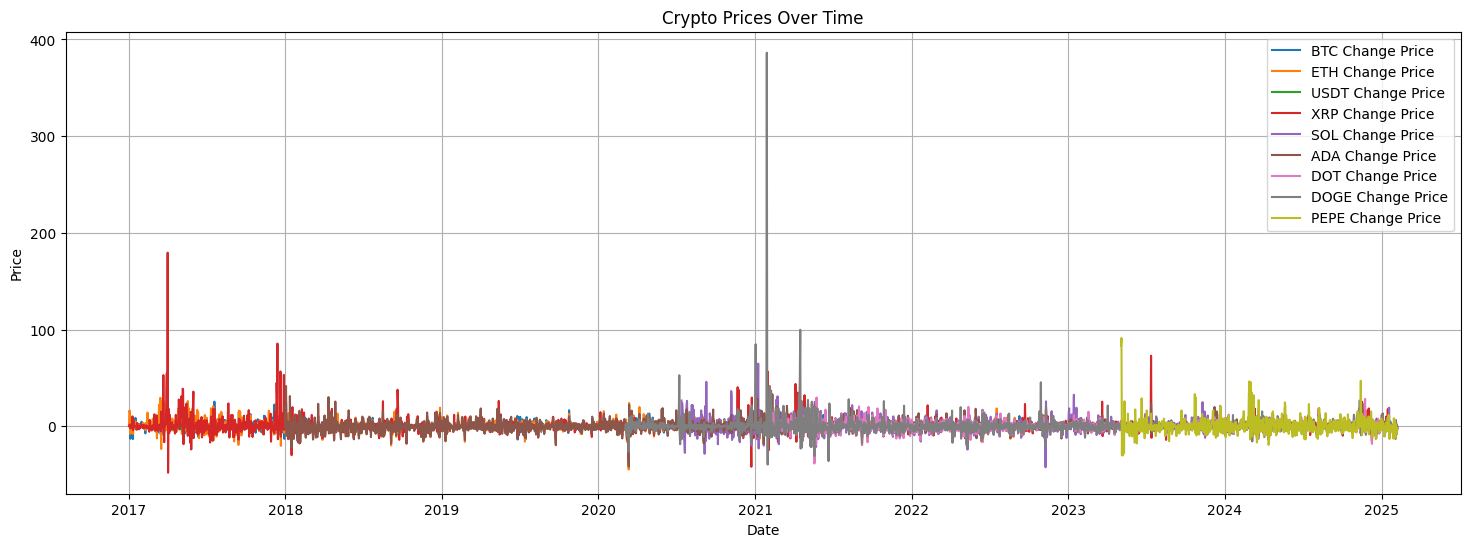

In [38]:
plt.figure(figsize=(18, 6))
for symbol, df in df_all.items():
    plt.plot(df["Date"], df["Change %"], label=f'{symbol} Change Price')
    #plt.plot(df["Date"], df["Open"], label=f'{symbol} Open Price')
    #plt.fill_between(df["Date"], df["Low"], df["High"], alpha=0.2, label=f'{symbol} Price Range')

plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.title(f'Crypto Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()